Theano 패키지는 GPU를 지원하는 선형 대수 심볼 컴파일러(GPU-Supporting Symbolic Linear Algebra Compiler)이다. 심볼 컴파일러란 수치적인 미분, 선형대수 계산 뿐 아니라 symbolic expression을 통해 정의된 수식(주로 목적 함수)을 사람처럼 미분하거나 재정리하여 전체 계산에 대한 최적의 계산 경로를 찾아내는 소프트웨어를 말한다. 

수치 미분을 사용한 연산에 비해 정확도나 속도가 빠르기 때문에 대용량 선형 대수 계산이나 몬테카를로 시뮬레이션, 또는 딥러닝에 사용된다. Theano 패키지의 또다른 특징은 GPU와 CPU에 대해 동일한 파이썬 코드를 사용할 수 있다는 점이다.

## GPU

**GPU는 GPGPU(General-Purpose computing on Graphics Processing Units: 범용 그래픽 연산 유니트)를 줄어서 쓰는 말이다.**

그래픽 작업은 다음 그림에서 보듯 상당한 병렬 연산을 필요로 하기 때문에 일반 CPU와 달리 **성능이 낮은 다수의 코어를 동시에 사용할 수 있는 구조**를 가지고 있다. 이러한 구조는 단순한 계산을 반복해야 하는 몬테카를로 시뮬레이션이나 딥 러닝에서 상당한 효과를 볼 수 있다.

[그림] CPU와 GPU 구조의 비교 : https://datascienceschool.net/upfiles/cd8c405de44e4ac8b39a0d3368a17b81.png

## CUDA와 OpenCL

GPU는 기본 구조와 하드웨어 명령어 체계가 일반적인 CPU와 다르기 때문에 별도의 라이브러리가 필요하다. 

**현재 많이 사용되는 GPU 연산용 라이브러리에는 nvidia 계열의 CUDA와 Apple, AMD, Intel 계열의 OpenCL 이 있다. 파이썬에서는 pyCUDA 패키지와 pyOpenCL 패키지를 사용할 수 있다.

## Theano 기본 사용법
Theano를 사용하기 위해서는 다음과 같은 과정을 거쳐야 한다.

* 심볼변수 정의
* 그래프 정의
* 심볼함수 정의
* 심볼함수 사용

### 1. 심볼변수 정의

Theano의 모든 변수는 심볼변수이므로 일반적으로 사용되는 변수와 혼동이 되지 않게 별도로 정의해야 한다.

스칼라, 벡터, 행렬을 정의하기 위해 **theano.tensor.T** 서브패키지의 **dscalar, dvector, dmatrix** 명령을 사용하거나 이미 심볼로 정의된 변수의 연산을 통해 자동으로 정의된다. 명령어 앞에 붙은 **d**는 **double** 자료형을 나타낸다.

In [1]:
# MKL 라이브러리가 설치되어 있으면 다음 코드를 우선 실행한다.
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

import theano
import theano.tensor as T

In [2]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')

type(x1), type(y1)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

벡터와 행렬도 마찬가지 방법으로 정의한다.

In [3]:
x2 = T.dvector('x2')
y2 = T.dvector('y2')

x3 = T.dmatrix('x3')
y3 = T.dmatrix('y3')

In [4]:
type(x2), type(y2), type(x3), type(y3)

(theano.tensor.var.TensorVariable,
 theano.tensor.var.TensorVariable,
 theano.tensor.var.TensorVariable,
 theano.tensor.var.TensorVariable)

### 2. 그래프 정의

이미 만들어진 심볼변수에 일반 사칙연산이나 Theano 수학 함수를 사용하여 다른 심볼변수를 만들 수 있다. **이렇게 만들어진 새로운 심볼 변수는 기존의 심볼변수와 연산관계를 가지는데 이러한 연산관계를 그래프(graph)라고 한다.**

In [5]:
z1 = x1 + y1
type(z1)

theano.tensor.var.TensorVariable

In [6]:
u1 = T.exp(z1)
type(u1)

theano.tensor.var.TensorVariable

In [7]:
z2 = T.dot(x2, y2)
z3 = T.sum(x3) + T.mean(y3)

In [8]:
type(z2), type(z3)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

### 3. 심볼 프린트 및 그래프 시각화

Theano의 심볼변수의 내용을 살펴보기 위해서는 **theano.printing.pprint** 명령 또는 **theano.printing.pydotprint** 을 사용한다.

In [9]:
T.printing.pprint(x1)

'x1'

In [10]:
T.printing.pprint(x2)

'x2'

In [11]:
T.printing.pprint(y1)

'y1'

In [12]:
T.printing.pprint(z1)

'(x1 + y1)'

In [13]:
T.printing.pprint(u1)

'exp((x1 + y1))'

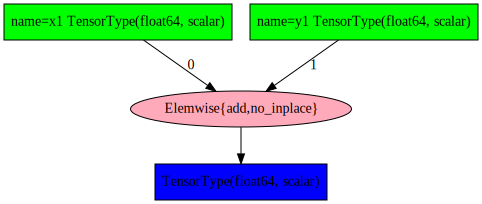

In [14]:
from IPython.display import SVG
SVG(T.printing.pydotprint(z1, return_image=True, format='svg'))

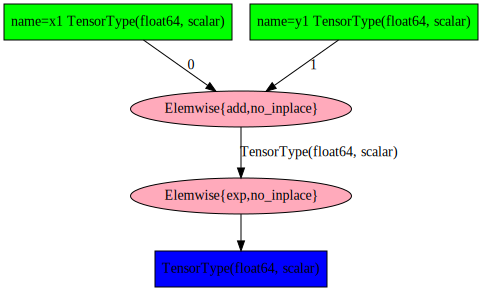

In [15]:
SVG(T.printing.pydotprint(u1, return_image=True, format='svg'))

### 3. 심볼 함수 및 사용

심볼 함수는 **theano.function** 명령으로 정의하며 **입력 심볼변수와 출력 심볼변수를 지정**한다. **출력 심볼변수는 입력 심볼변수의 연산으로 정의되어 있어야 한다.** 처음 심볼 함수를 정의할 때는 GPU 또는 CPU에서 돌아갈 수 있도록 컴파일을 하기 때문에 시간이 다소 걸릴 수 있다.

In [16]:
%time f1 = theano.function(inputs=[x1, y1], outputs=z1)

CPU times: user 185 ms, sys: 46 ms, total: 231 ms
Wall time: 242 ms


함수의 값을 계산하려면 일반 함수와 같이 사용하면 된다.

In [17]:
f1(1, 2)

array(3.)

벡터와 행렬도 마찬가지 방법으로 사용한다.

In [18]:
f2 = theano.function([x2, y2], z2)  # z2 = T.dot(x2, y2). x2와 y2는 벡터
f2([1, 2], [3, 4])  # 1*3 + 2*4 = 11

array(11.)

In [19]:
f3 = theano.function([x3, y3], z3) # z3 = T.sum(x3) + T.mean(y3). x3, y3 은 행렬
f3([[1], [2]], [[3], [4]])  # 3 + 3.5 = 6.5

array(6.5)

로지스틱 함수나 난수를 사용하는 함수는 다음과 같이 정의한다.

In [20]:
s1 = 1 / (1 + T.exp(-x1))  # 스칼라 입력
logistic = theano.function([x1], s1)  # 출력은 심볼변수의 연산
logistic(1)

array(0.73105858)

In [21]:
s2 = 1 / (1 + T.exp(-x2)) # 벡터 입력
logistic2 = theano.function([x2], s2)
logistic2([0, 1])

array([0.5       , 0.73105858])

난수 발생도 theano 의 **RandomStreams** 명령을 사용해야 한다.

In [22]:
from theano.tensor.shared_randomstreams import RandomStreams

srng = RandomStreams(0)
rv_u = srng.uniform([]) # 유니폼 분포
f_rv_u = theano.function([], rv_u)  # 입력이 없을 때에는 []
f_rv_u(), f_rv_u(), f_rv_u(), f_rv_u()

(array(0.48604732), array(0.68571232), array(0.98557605), array(0.19559641))

In [23]:
rv_u1 = srng.uniform([1]) # 유니폼 분포
f_rv_u1 = theano.function([], rv_u1)
f_rv_u1()

array([0.53096416])

## 변수 갱신

심볼의 값을 갱신(update)하는 수식은 단순한 심볼 그래프로 표현할 수 없다. **갱신되는 값은 수식으로 연결되는 심볼이 아니라 단순한 메모리 상의 값이기 때문이다. 따라서 이러한 값들은 공유 메모리(shared memory)라는 곳에 저장한다.** 

공유 메모리에 저장할 심볼은 **shared** 라는 명령을 이용하여 만들고 **초기값**과 **심볼 이름**을 인수로 넣어 준다.

공유 메모리의 값을 갱신하는 할 때 **심볼 그래프를 사용하지 않고 function 명령에서 직접 updates 인수를 사용해야 한다.**

예를 들어 다음과 같은 수식을 생각하자.

$$w_{k+1} = w_k + x$$

이 값을 갱신하는 코드는 다음과 같다.

In [24]:
x = T.dscalar('x')
y = x
w = theano.shared(0.0, name='w') # 공유메모리에 저장할 심볼 w 만들기. 초기값 0.0, 심볼이름 w 설정

update = theano.function([x], y, updates=[(w, w+x)])  # 입력변수를 x로 넣고, 출력변수를 y, w를 업데이트하기 위해 x를 더한 w 값 설정

w.set_value(f_rv_u())  # 유니폼 분포의 스칼라 난수값 w 입력
w.get_value()

array(0.58341167)

In [25]:
update(1)  # x 값 입력
w.get_value()

array(1.58341167)

In [26]:
update(2) # w + 2
w.get_value()

array(3.58341167)

In [27]:
update(1)
w.get_value()

array(4.58341167)

## 그래프 최적화

Theano는 빠른 함수 계산을 위한 그래프 최적화를 지원한다. 예를 들어 다음과 같은 함수는 제곱 연산을 사용하여 최적화 할 수 있다.

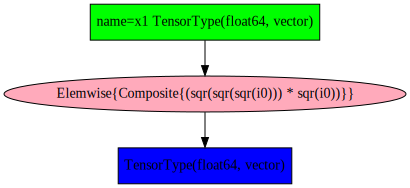

In [28]:
x1 = T.dvector('x1')  # 벡터 x1 정의
y1 = x1 ** 10         # 연산 정의
f1 = theano.function([x1], y1)

SVG(theano.printing.pydotprint(f1, return_image=True, format='svg'))

함수 실행 속도를 비교해 보면 다음과 같다.

In [29]:
import numpy as np
x1 = np.ones(10000000)

%timeit x1 ** 10

76.4 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%timeit f1(x1)

30.4 ms ± 728 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 미분

심볼릭 연산의 가장 큰 장점은 빠르고 정확하게 미분값(gradient, Hessian 등)을 계산할 수 있다는 점이다. Theano 패키지는 **grad** 라는 명령을 사용하여 미분 관계식을 자동으로 구한다.

In [31]:
x1 = T.dscalar('x1')  # x1 심볼변수 정의
y1 = x1 ** 2          # 심볼연산 정의
gy1 = T.grad(y1, x1)  # 미분연산 정의. x1으로 y1을 미분
fy1 = theano.function([x1], y1)  # 제곱 함수 정의
fgy1 = theano.function([x1], gy1) # 미분 함수 정의

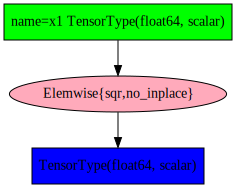

In [32]:
SVG(theano.printing.pydotprint(fy1.maker.fgraph.outputs[0], return_image=True, format='svg'))

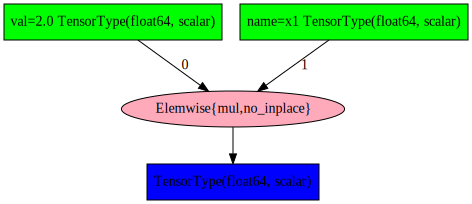

In [33]:
SVG(theano.printing.pydotprint(fgy1.maker.fgraph.outputs[0], return_image=True, format='svg'))

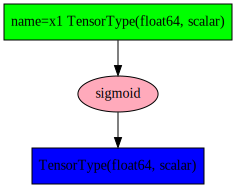

In [34]:
x1 = T.dscalar('x1') # x1 심볼변수 정의
s1 = 1 / (1 + T.exp(-x1))  # logistic 연산관계(그래프) 정의
logistic = theano.function([x1], s1)  # 로지스틱 함수 정의
gs1 = T.grad(s1, x1)  # 미분 연산관계(그래프) 정의
dlogistic = theano.function([x1], gs1)  # 미분 함수 정의

SVG(theano.printing.pydotprint(logistic, return_image=True, format='svg'))  # logistic 함수 그래프 시각화

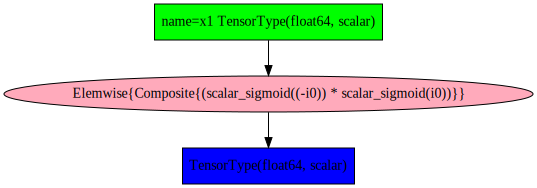

In [35]:
SVG(theano.printing.pydotprint(dlogistic.maker.fgraph.outputs[0], return_image=True, format='svg')) # 미분함수 그래프 시각화

In [36]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)
fm._rebuild()

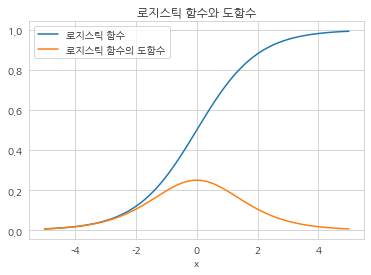

In [37]:
xx = np.linspace(-5, 5, 100)
y1 = np.hstack([logistic(xi) for xi in xx])
y2 = np.hstack([dlogistic(xi) for xi in xx])
plt.plot(xx, y1, label='로지스틱 함수')
plt.plot(xx, y2, label='로지스틱 함수의 도함수')
plt.xlabel('x')
plt.title("로지스틱 함수와 도함수")
plt.legend(loc=0)
plt.show()

## 퍼셉트론 구현

Theano를 사용하면 다음과 같이 퍼셉트론을 구현할 수 있다. 여기에서는 y값이 1 또는 -1 값을 가지고 활성화 함수는 **hyper tangent** 함수를 사용하였다. 오차 함수는 **perceptron 오차 함수**를 사용한다.

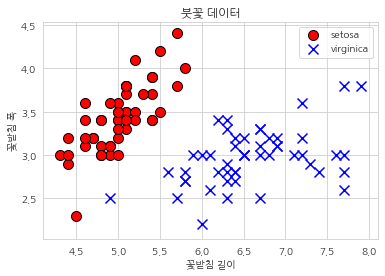

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] - 1  # 1 또는 -1

plt.scatter(X_data[y_data==-1, 0], X_data[y_data==-1, 1], label='setosa', c='r', marker='o', s=100, edgecolors='k')
plt.scatter(X_data[y_data==1, 0], X_data[y_data==1, 1], label='virginica', c='b', marker='x', s=100, edgecolors='k')
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.legend()
plt.title("붓꽃 데이터")
plt.show()

출력을 **a**, 목적 함수를 **cost**, 목적 함수의 미분(그레디언트)을 **gradient**로 정의한다.

In [39]:
X = T.matrix('X')  # 심볼변수 X 행렬 정의
y = T.dvector('y') # 심볼변수 y 벡터 정의

np.random.seed(2)
w = theano.shared(0.001 * np.random.randn(2), name='w')  # 가중치 벡터는 업데이트되는 변수이므로 공유메모리 설정
b = theano.shared(0.001 * np.random.randn(1)[0], name='b') # bias 변수 
w.get_value(), b.get_value()

(array([-4.16757847e-04, -5.62668272e-05]), array(-0.0021362))

In [40]:
z = T.tanh(T.dot(X, w) + b)  # 탄젠트 연산 관계(그래프) 설정 : 활성화 함수
cost = T.sum(T.maximum(0, -y * z))  # cost 연산관계 설정

gw, gb = T.grad(cost, [w, b])  # 비용함수 w, b에 대해 각각 미분
mu = 1e-6
train = theano.function([X, y], cost, updates=[(w, w-mu*gw), (b, b-mu*gb)])

초기값에서 그레디언트 값을 계산하고 이를 이용하여 가중치를 갱신한다.

In [41]:
cost_history = []
for i in range(50):
    cost_history.append(train(X_data, y_data))

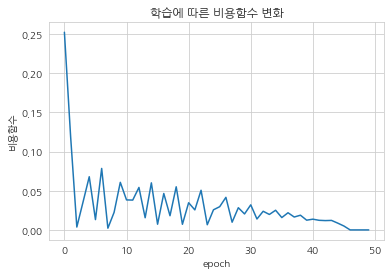

In [42]:
plt.plot(cost_history)
plt.xlabel("epoch")
plt.ylabel("비용함수")
plt.title("학습에 따른 비용함수 변화")
plt.show()

In [43]:
y_pred = T.sgn(z)  # -1 or 1로 바꾸는 연산관계 정의
y_pred_func = theano.function([X], y_pred)  # predict 함수 정의
y_pred = y_pred_func(X_data)
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_data, y_pred)

array([[50,  0],
       [ 0, 50]])

### 연습 문제 1

위 퍼셉트론 코드를 다음과 같이 고쳐라.

* y값은 0과 1이라는 값만 가진다.
* 활성화 함수는 로지스틱 함수를 사용한다.
* 코스트 함수는 다음과 같은 오차 제곱 함수를 사용한다.

$$C = \sum_{i=1}^N (y - \hat{y})^2$$

In [45]:
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] / 2
X_data.shape, y_data.shape

((100, 2), (100,))

In [53]:
X = T.dmatrix('X')  # 심볼변수 X 정의
y = T.dvector('y')  # 심볼변수 y 정의
np.random.seed(2)
w = theano.shared(0.001 * np.random.randn(2), name='w')
b = theano.shared(0.001 * np.random.randn(1)[0], name='b')
w.get_value(), b.get_value()

(array([-4.16757847e-04, -5.62668272e-05]), array(-0.0021362))

In [54]:
p_1 = 1 / ( 1 + T.exp(-T.dot(X, w) - b))  # 로지스틱 연산관계 정의
prediction = p_1 > 0.5                         # the prediction thresholded
xent = -y * T.log(p_1) - (1 - y) * T.log(1 - p_1) # Cross-entropy loss function
cost = xent.mean() + 0.01 * (w ** 2).sum()    # The cost to minimize
gw, gb = T.grad(cost, [w, b])
mu = 0.1

# compile
train = theano.function([X, y], outputs=[prediction, xent], updates=[(w, w-mu*gw), (b, b-mu*gb)])
predict = theano.function(inputs=[X], outputs=[prediction])

In [55]:
# train
cost_history = []

for i in range(50):
    pred, err = train(X_data, y_data)
    cost_history.append(err)
print("Final model:")
print(w.get_value())
print(b.get_value())
print("target values for X_data:\n", y_data)
print("prediction on X_data:\n", predict(X_data))

Final model:
[ 0.56823654 -0.93222845]
-0.17365402854062426
target values for X_data:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
prediction on X_data:
 [array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  T

In [60]:
confusion_matrix(y_data, predict(X_data)[0])

array([[49,  1],
       [ 0, 50]])

In [61]:
y_data.shape, predict(X_data)[0].shape

((100,), (100,))